# Кластеризация

## Основные понятия

**Кластерный анализ (Data clustering)** — это задача машинного обучения БЕЗ УЧИТЕЛЯ, которая заключается в разбиении заданной выборки данных (объектов) так, чтобы каждый кластер состоял из схожих объектов, а объекты разных кластеров значительно отличались друг от друга.

С помощью методов кластеризации мы можем автоматически
найти группу похожих объектов, возможно, выделить аномалии, какие-то изолированные объекты, которые требуют дополнительного изучения или выбрасывания из данных, и кластеризация
позволяет провести более детальный анализ самих кластеров. Иногда бывает полезно построить
отдельные модели на каждом кластере вместо того, чтобы строить одну модель на всех данных и
получить какой-то мусор.

`Y = a*X + b`

Математический аспект машинного обучения: машинное обучение пытается предсказать значение переменной `Y` с учетом ввода набора `X`.

`X` - это признаки нашего объекта (пациент, клиент банка и т.д.).

`X` - как правило, это набор признаков, т е вектор.

`X = [x1, x2, x3, ...]`, например, где х1 - возраст человек, х2 - пол человека, х3 - доход этого человека, и так далее.

`Y` - это в данном случае ответ (target). В случае с кластеризацией - это кластер, к которому относится тот или иной объект. В отличии от Х это всегда одномерный вектор, т.е. одному объекту соответствует одно значении (в отличии от X, где есть х1, х2 ...)

## Примеры использования кластеризации в реальной жизни

**Продажи и маркетинг**

Крупные компании стремятся к таргетированию и персонализации своих продуктов. Они делают это, анализируя особенности людей и делясь программами для их привлечения.

Это проверенный и апробированный метод, который помогает организациям нацеливаться на конкретную аудиторию. К сожалению, некоторые компании безуспешно работают в области продаж и маркетинга.

Чтобы получить максимальную отдачу от своих инвестиций, необходимо правильно ориентироваться на людей. Вы рискуете значительными потерями и недоверием клиентов, не анализируя то, чего хочет ваша аудитория. Алгоритмы кластеризации могут сгруппировать людей со схожими чертами и проанализировать, приобретут ли они Ваш продукт.

Создание групп может помочь предприятиям провести тесты, чтобы определить, что им необходимо сделать для улучшения продаж.

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance (3).csv to insurance (3).csv


In [ ]:
import pandas as pd

df = pd.read_csv('mall_clustering_with_groups (1).csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,0,1,0,19,15,39,2
1,1,2,0,21,15,81,1
2,2,3,1,20,16,6,0
3,3,4,1,23,16,77,1
4,4,5,1,31,17,40,2


In [ ]:
df['cluster'].value_counts()

1    57
3    48
0    48
2    47
Name: cluster, dtype: int64

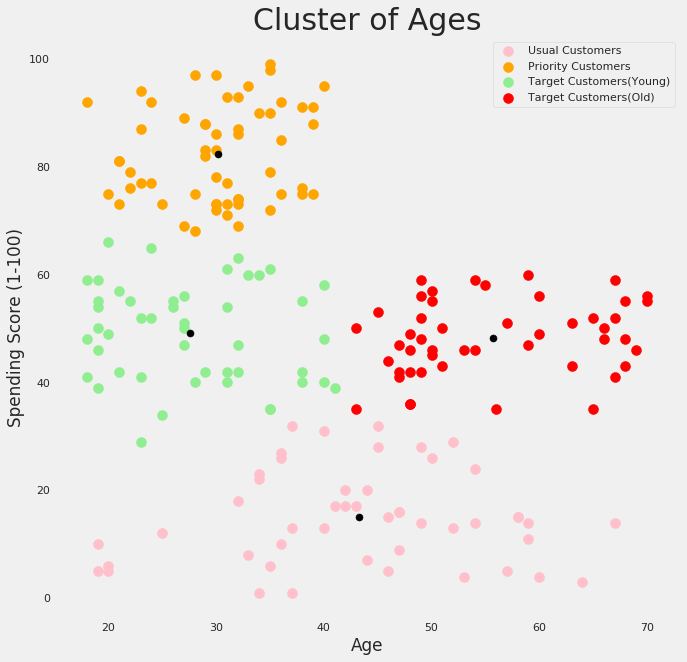

**Медицина**

Этот набор данных содержит 1339 записей о медицинском страховании. Индивидуальные медицинские расходы, выставляемые медицинским страхованием, возраст, пол, семейное положение и курит ли пациент.

- **bmi:** индекс массы тела, обеспечивающий понимание тела, вес, который относительно высокий или низкий по отношению к росту, объективный индекс веса тела (кг / м ^ 2) с использованием отношения роста к весу, в идеале от 18,5 до 24,9

- **charges**: индивидуальные медицинские расходы, выставленные на счет медицинского страхования.

https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
import pandas as pd

df = pd.read_csv('insurance (3).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


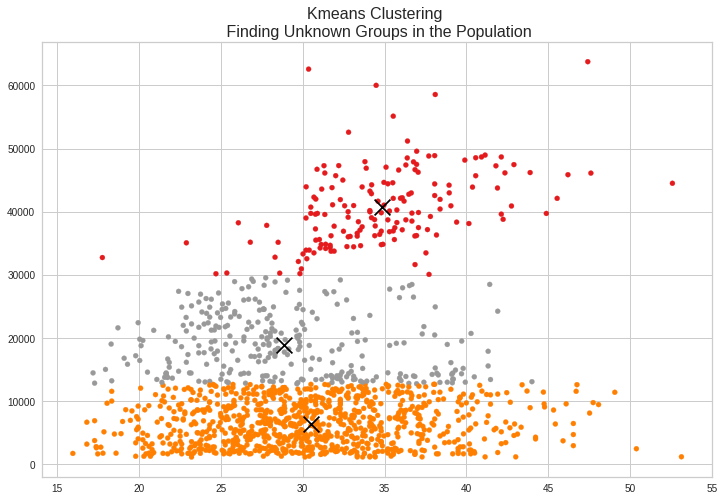

На графике представлен один из вариантов решения задачи, когда получется три кластера.

- По оси X - bmi
- По оси Y - charges

Мы видим из графика, что в оранжевом кластере, например у нас получилась группа пациентов с самыми низкими расходами и разбросом bmi по всему диапазону

## Основные методы кластеризации

Алгоритмы кластеризации никак не используют информацию об истинных метках объектов и оперируют лишь похожестью объекта. Ну а что такое похожесть, в каждом алгоритме
кластеризации определяется по-своему.

Самые популярные методы:
1. Метод k-средних (k-means)
2. Иерархическая кластеризация
3. DBSCAN

В курсе мы с Вами изучим первые два метода, а сегодня остановимся на 1.

## Метод k-средних

### Основные моменты алгоритма

**Метод k-средних** – это метод кластерного анализа, цель которого является разделение M наблюдений/объектов (из пространства ) на k кластеров, при этом каждое наблюдение относится к тому кластеру, к центру (центроиду) которого оно ближе всего. 

Центроид - это центр кластера.

**Что важно для алгоритма и что является его недостатком и преимуществом?**

1. Необходимо заранее знать количество кластеров - это существенный минус алгоритма. Тут встает вопрос как узнать количество кластеров (помним что у нас обучение без учителя, значит правильных ответов нет).
2. Метод очень простой и быстрый - это является его преимуществом перед другими методами.
3. Для постоения алгоритма необходимо знать начальные центры кластеров - опять же встает как выбрать начальные центроиды?

**Как происходит разбиение данных на кластеры?**

Возникает он из следующей оптимизационной задачи: у нас есть некоторое множество объектов, мы хотим найти в них k кластеров, каждый из которых характеризуется центроидом Сk. Объект относится к соответствующему кластеру, если его центроид находится ближе других центроидов к этому объекту.

Алгоритм состоит из следующих шагов:
1. Инициализация центроидов (например, рандомно)
2. Обновление состава кластеров, то есть приписывание объекта к тому кластеру, центроид которого расположен ближе к этому объекту.
3. Обновление положения самих центроидов, то есть пересчитывание положения центроидов, как центра масс объектов, которые лежат в соответствующем кластере.
4. Шаги 2 и 3 продолжаются до тех пор пока не выполнятся некоторые правила останова, например, будет достигнуто какое-то максимальное количество итераций или пока кластеры не перестанут меняться.


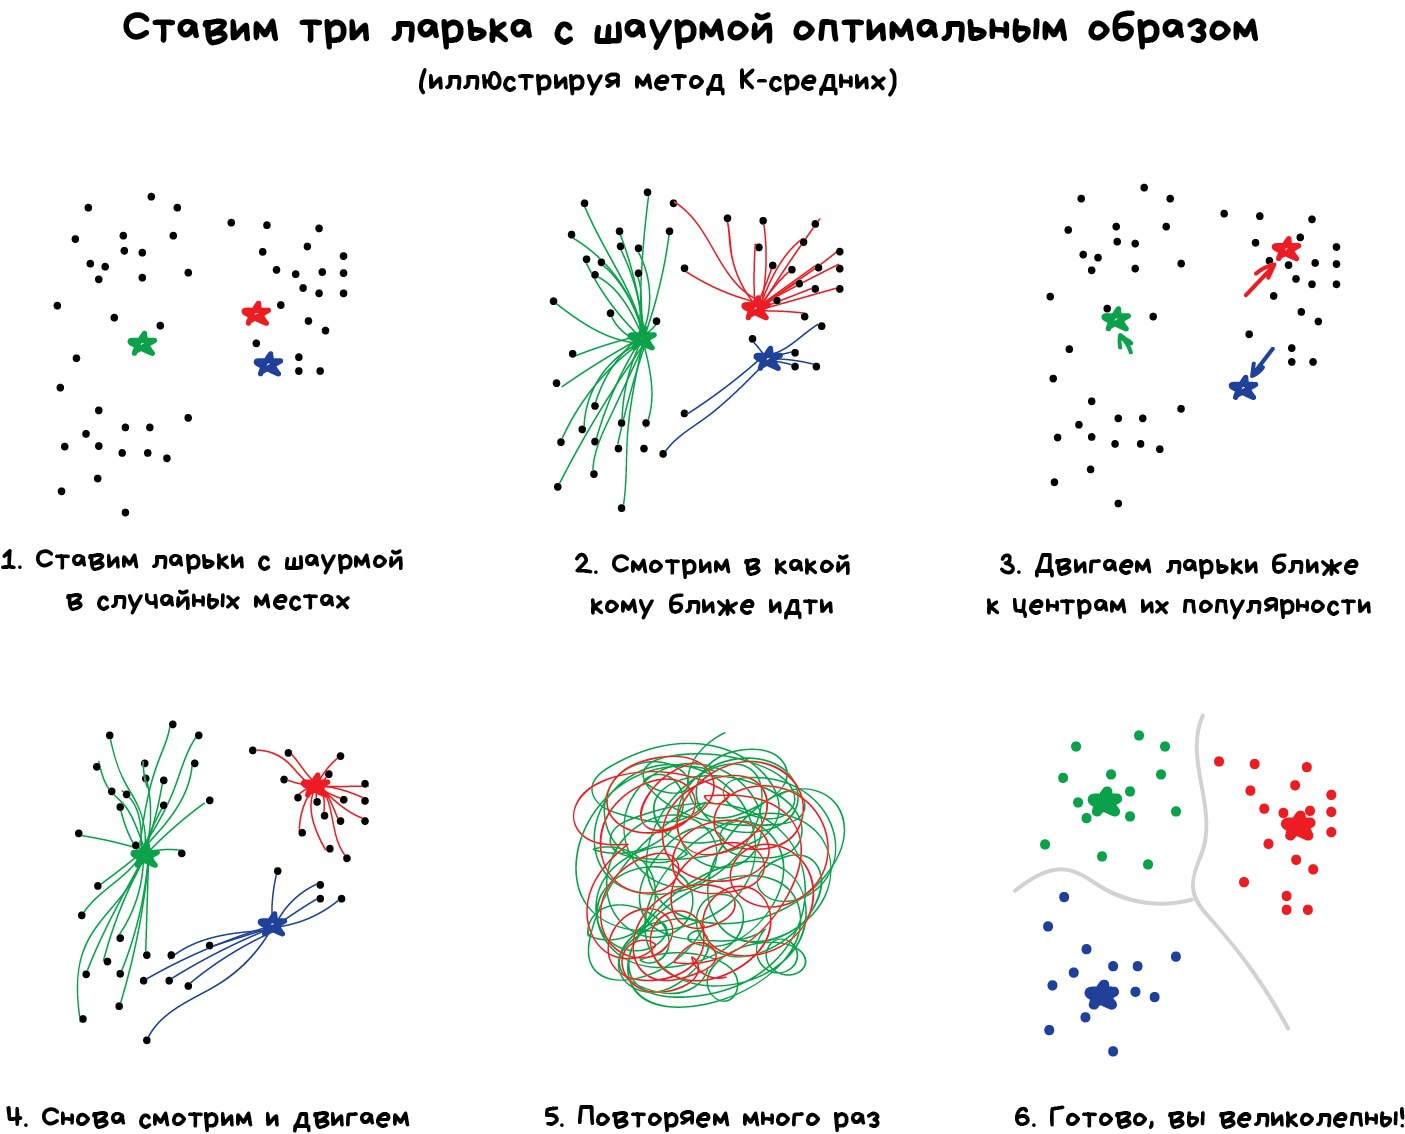

**Отметим еще важный момент, как вычисляется расстояние между точками (между объектом и центроидом)?**

Кластеризация объектов происходит таким образом, чтобы минимизировать следующий критерий - сумму квадратов расстояния между объектом и ближайшим к нему центроидом по всем кластерам, то есть значение.

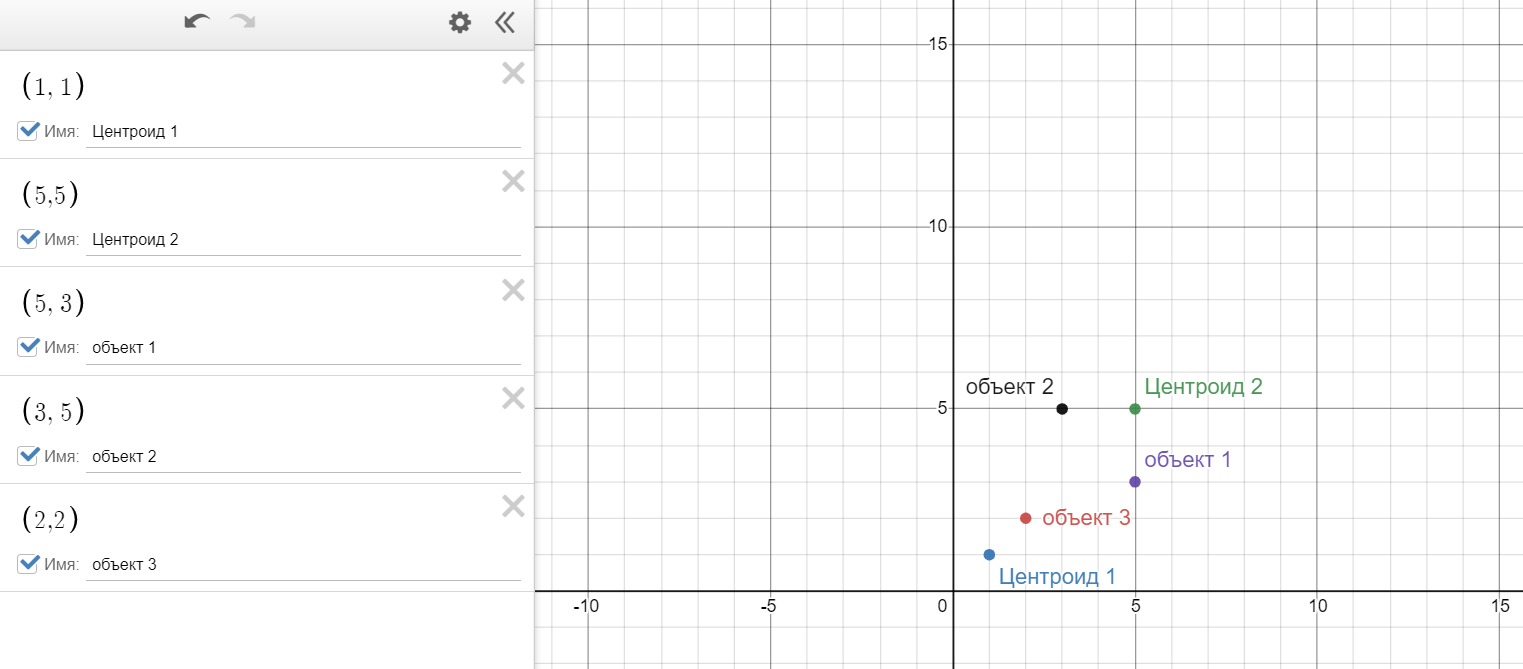

**Задача 1.**
Есть два центроида - 1 и 2, т.е. два кластера потенциальных.

К какому центроиду будут отнесены объекты? Вычислите расстояния от объектов до каждого центроида.

Искать центроиды удобно и просто, но в реальных задачах кластеры могут быть совсем не круглой формы. Вот вы геолог, которому нужно найти на карте схожие по структуре горные породы — ваши кластеры не только будут вложены друг в друга, но вы ещё и не знаете сколько их вообще получится.

### Как найти оптимальное число кластеров k?

Одна из самых сложных задач в этом алгоритме кластеризации – выбрать правильные значения k. Существует два метода.

1. **Метод локтя**

**Метод локтя (Elbow Rule)** – один из самых известных методов, с помощью которого вы можете выбрать правильное значение k и повысить производительность Модели (Model). Этот эмпирический метод вычисляет сумму квадратов расстояний между точками и вычисляет Среднее значение (Mean).

Когда значение k равно 1, сумма квадрата внутри кластера будет большой. По мере увеличения значения k сумма квадратов расстояний внутри кластера будет уменьшаться.

Наконец, мы построим график между значениями k и суммой квадрата внутри кластера, чтобы получить значение k. Мы внимательно рассмотрим график. В какой-то момент значение по оси x резко уменьшится. Эта точка будет считаться оптимальным значением k:

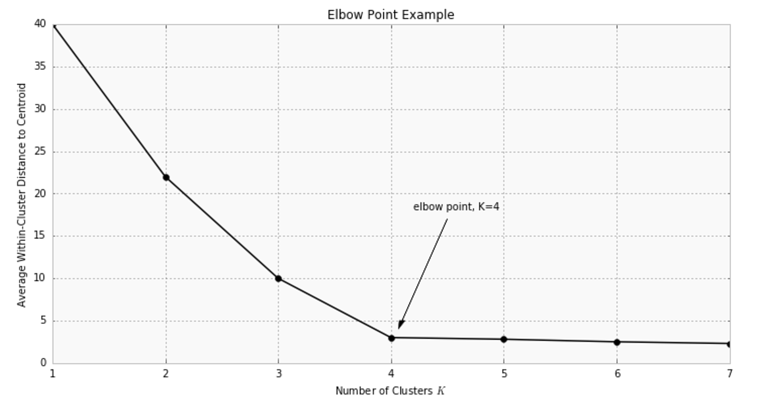

2. **Метод силуэта**

Метод силуэта (Silhouette Method) вычисляет среднее расстояние между точками в своем кластере ai и среднее расстояние от точек до следующего ближайшего кластера, называемого bi.

Теперь мы можем вычислить коэффициент силуэта всех точек в кластерах и построить график. Последний также поможет в обнаружении Выбросов (Outlier). Значение метрики силуэта находится в диапазоне от -1 до 1. Обратите внимание, что коэффициент силуэта, равный –1 – это наихудший сценарий. Для картинки выше система вычислила расстояния между всеми точками при различных допущениях о числе кластеров и построила соответствующие горизонтальные гистограммы. Мы выбираем k, равный 3, потому что зеленая гистограмма меньше, хотя стоит, возможно, проверить и бо́льшие значения.

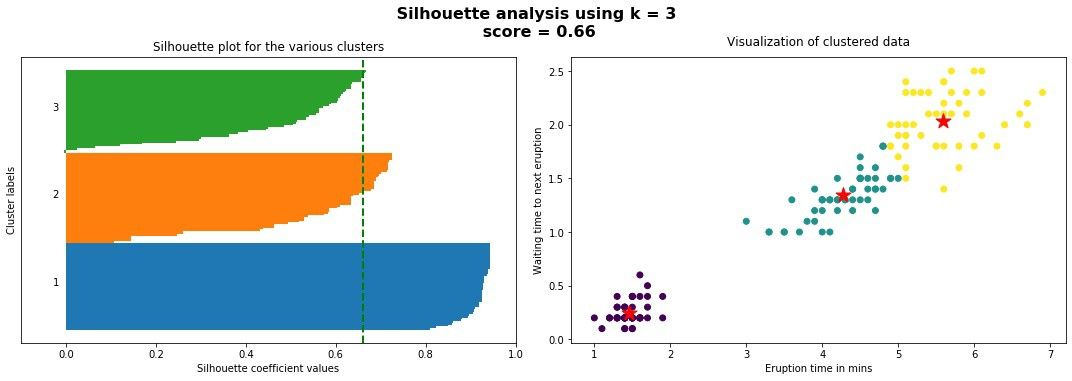

### Интерактивная картинка работы алгоритма k-means

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interactive
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=600, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=200)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Относим точки к ближайшему центроиду",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Меняем центроид на среднее",
                     ha='right', va='top', size=14)
    
    return interactive(_kmeans_step, frame=(0, 50),
                    n_clusters=(min_clusters, max_clusters))

interactive_plot = plot_kmeans_interactive()
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=4, description='n_clust…

### Практическое задание

Возьмем для примера самый извесный набор данных для кластеризации. 

Этот набор данных состоит из трех различных типов ирисов (Setosa, Versicolour и Virginica), у которых есть разные характеристики: Длина лепестка,Ширина лепестка,Длина лепестка и Ширина лепестка.

https://www.kaggle.com/uciml/iris

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [ ]:
import pandas as pd

iris = pd.read_csv('Iris (1).csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Выделим вектор признаков Х
# Выделим вектор ответов Y
# Несмотря на то, что это обучение с учителем, здесь есть ответы по двум причинам:
# 1. Этот набор данных также можно использовать для классификации
# 2. Это демонстрационный набор данных, который носит учебных и демонстрационный характер, нежели практический

X = iris.loc[:,['SepalLengthCm','PetalLengthCm']]
Y = iris['Species']

In [ ]:
# реализуем кластеризацию, пока без поиска оптимального числа кластеров
from sklearn.cluster import KMeans

# Создаем модель кластеризации
kmeans = KMeans(n_clusters=3)

# обучим нашу модель
kmeans.fit(X)

# выведем полученные метки кластеров, которые вычислил алгоритм
# Setosa - 0, Versicolour – 1 и Virginica – 2
Y_pred = kmeans.labels_
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

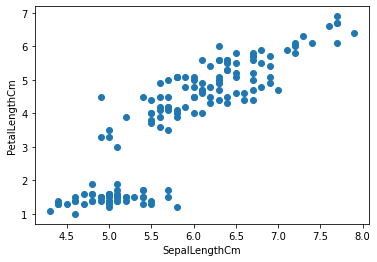

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(iris['SepalLengthCm'],iris['PetalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

In [ ]:
X['cluster'] = Y_pred
X

,SepalLengthCm,PetalLengthCm,cluster
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,1
147,6.5,5.2,2
148,6.2,5.4,2


In [ ]:
X[X['cluster']==0]

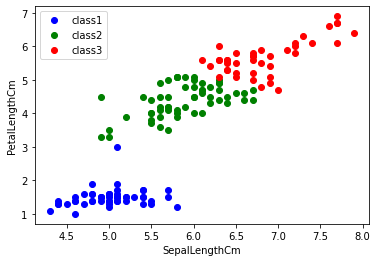

In [ ]:
import matplotlib.pyplot as plt

# X[строки, столбцы]
plt.plot(X[X['cluster']==0]['SepalLengthCm'], X[X['cluster']==0]['PetalLengthCm'], 'bo', label='class1')

plt.plot(X[X['cluster']==1]['SepalLengthCm'], X[X['cluster']==1]['PetalLengthCm'], 'go', label='class2')

plt.plot(X[X['cluster']==2]['SepalLengthCm'], X[X['cluster']==2]['PetalLengthCm'], 'ro', label='class3')

plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc=0)
plt.show()

Теперь попробуем не наугад выбрать число кластеров, а эмпирическим путем.

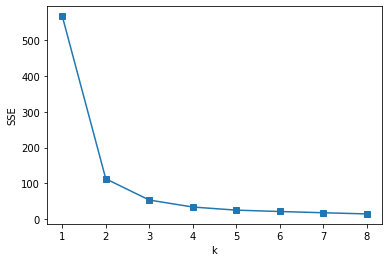

In [ ]:
# метод локтя
X = iris.loc[:,['SepalLengthCm','PetalLengthCm']]

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,9):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
 
plt.plot(range(1,9), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)